===============================================
Classical ML with Scikit-learn
==========================

Dataset: Iris Species Dataset
==

Goal:
====

1. Preprocess the data (handle missing values, encode labels).
2. Train a decision tree classifier to predict iris species.
3. Evaluate using accuracy, precision, and recall.

About Dataset
============
The Iris dataset was used in R.A. Fisher's classic 1936 paper, The Use of Multiple Measurements in Taxonomic Problems, and can also be found on the UCI Machine Learning Repository.

It includes three iris species with 50 samples each as well as some properties about each flower. One flower species is linearly separable from the other two, but the other two are not linearly separable from each other.

The columns in this dataset are:
i. Id

ii. SepalLengthCm

iii. SepalWidthCm

iv. PetalLengthCm

v. PetalWidthCm

vi. Species


# 1. Preprocess The Data
=========================================

In [1]:
# Load the required libraries for analysis
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Load Iris dataset
df = pd.read_csv('Iris.csv')

In [3]:
# Show the first 10 rows of the dataset
df.head(10)

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa
5,6,5.4,3.9,1.7,0.4,Iris-setosa
6,7,4.6,3.4,1.4,0.3,Iris-setosa
7,8,5.0,3.4,1.5,0.2,Iris-setosa
8,9,4.4,2.9,1.4,0.2,Iris-setosa
9,10,4.9,3.1,1.5,0.1,Iris-setosa


In [4]:
#  Handle missing values
#First show the number of missing values in every column

df.isnull().sum()

Id               0
SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

Since there are no missing values, no further processing is required as far as handling missing values is concerned

In [5]:
# Show the columns datatypes

df.dtypes


Id                 int64
SepalLengthCm    float64
SepalWidthCm     float64
PetalLengthCm    float64
PetalWidthCm     float64
Species           object
dtype: object

In [6]:
# Basic statistics about the data

df.describe().T  # Transpose the output for better visualization


,count,mean,std,min,25%,50%,75%,max
Id,150.0,75.500000,43.445368,1.0,38.25,75.50,112.75,150.0
SepalLengthCm,150.0,5.843333,0.828066,4.3,5.10,5.80,6.40,7.9
SepalWidthCm,150.0,3.054000,0.433594,2.0,2.80,3.00,3.30,4.4
PetalLengthCm,150.0,3.758667,1.764420,1.0,1.60,4.35,5.10,6.9
PetalWidthCm,150.0,1.198667,0.763161,0.1,0.30,1.30,1.80,2.5


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


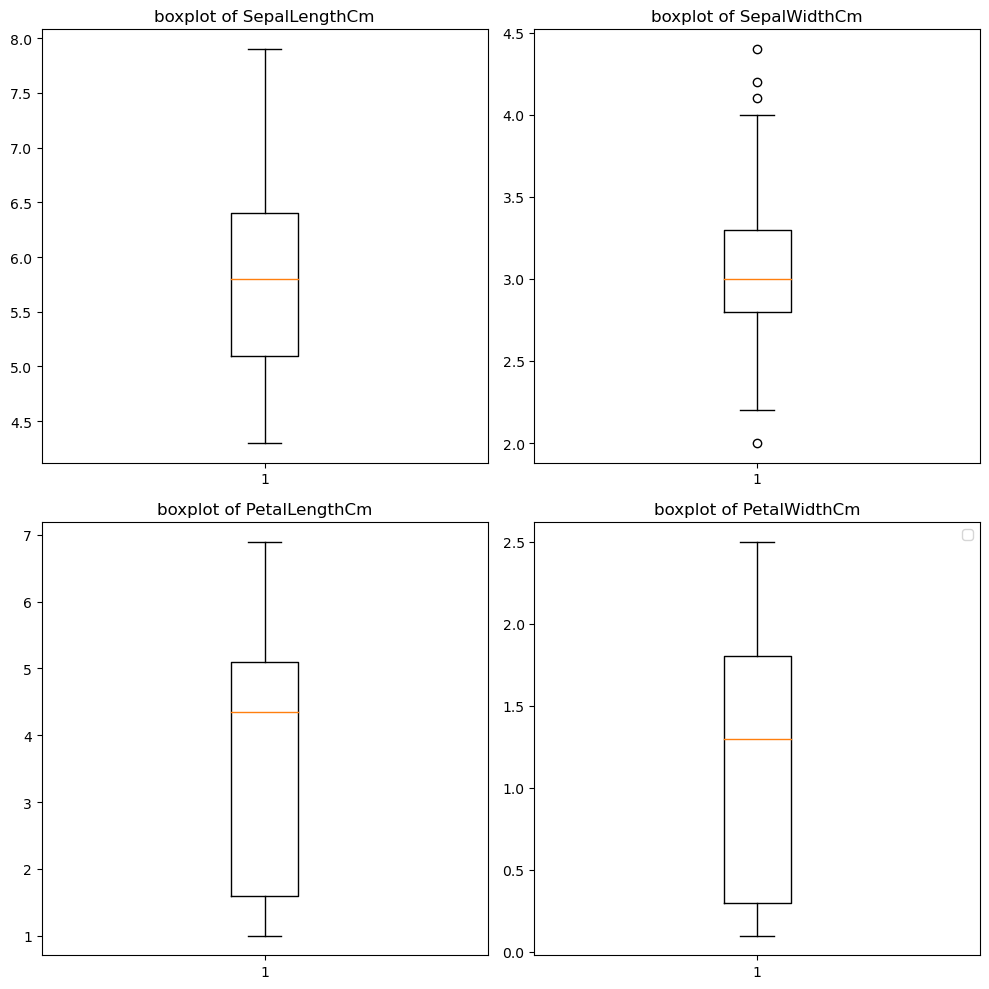

In [7]:
# Check for outliers in numeric columns

column_to_plot = [c for c in df.columns if c not in ['Species', 'Id']]
fig, axes = plt.subplots(int(len(column_to_plot)/2), 2, figsize=(10,10))

axes = axes.flatten()

for i, col in enumerate(column_to_plot):
    data = df[col]
    ax = axes[i]
    ax.boxplot(data)
    ax.grid = True
    ax.set_title(f"boxplot of {col}")

plt.tight_layout()
plt.legend()
plt.show()

There is an outlier in SepalWidthCm column¶

In [8]:
# First remove the Id column from the dataset 

df2 = df[[col for col in df.columns if col != 'Id']]

# Encode the species column - to convert categorical variables into numerical format
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

df2['EncodedSpecies'] = le.fit_transform(df2['Species'])

# drop the species column since encoded species column has been created
df2 = df2.drop(columns=['Species'])
df2.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,EncodedSpecies
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


Text(0.5, 1.0, 'Correlation Heatmap')

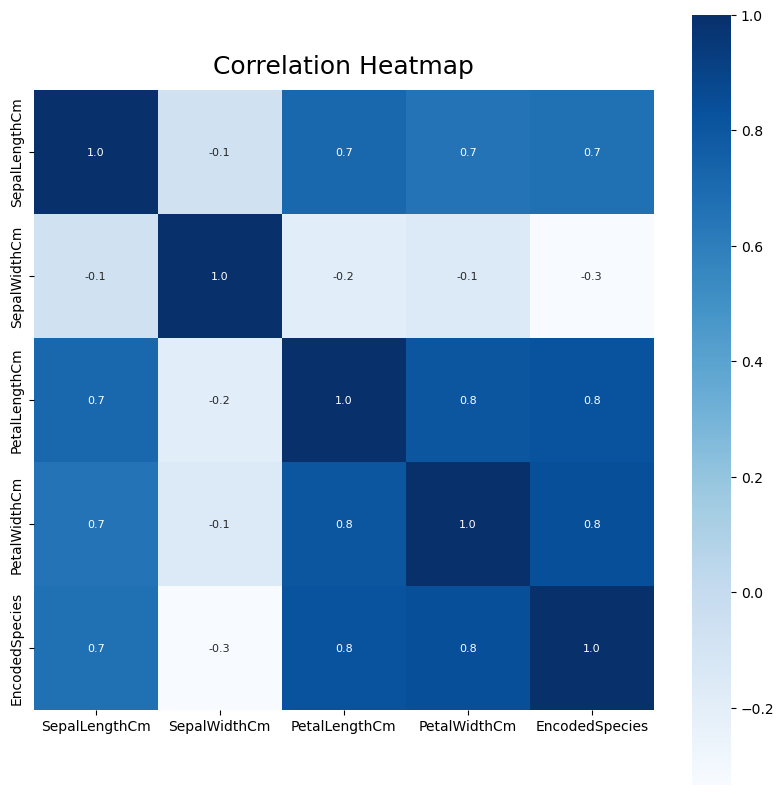

In [9]:
# constructing a heatmap to understand the correlation between the columns
plt.figure(figsize=(10,10))
heatmap=sns.heatmap(df2.corr(method = 'kendall'), cbar=True, square=True, fmt = '.1f', annot = True, annot_kws={'size':8}, cmap = 'Blues')
heatmap.set_title('Correlation Heatmap', fontdict={'fontsize':18}, pad=12)

Scatter Plots
==========

In [10]:
# Unique Columns in the dataframe
cols = df2.columns.unique()
cols

Index(['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm',
       'EncodedSpecies'],
      dtype='object')

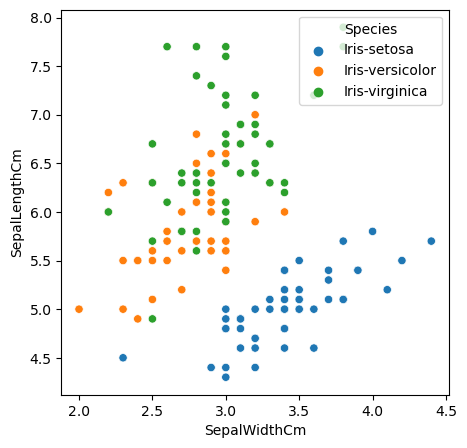

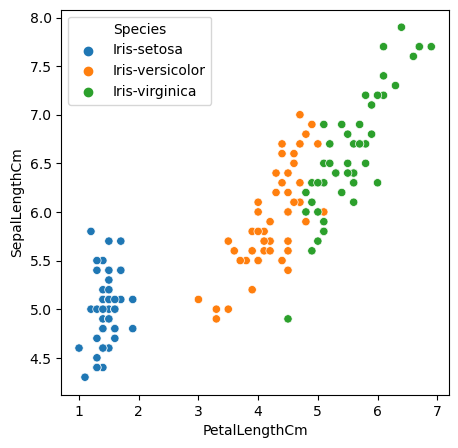

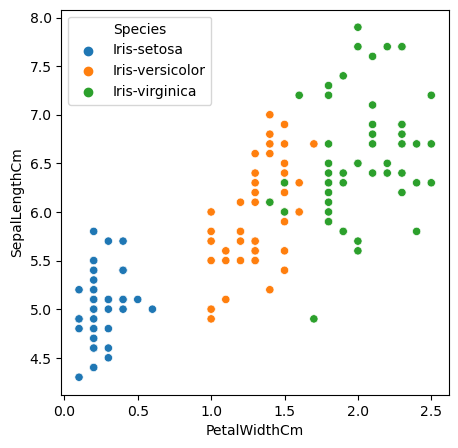

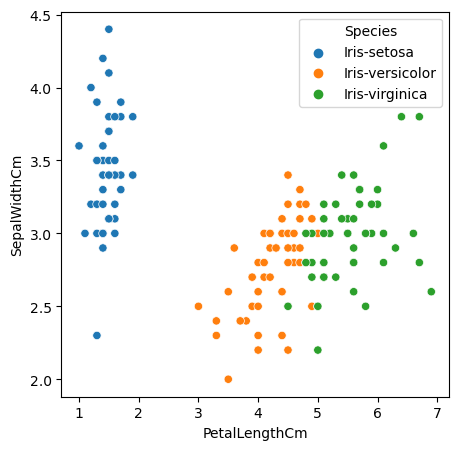

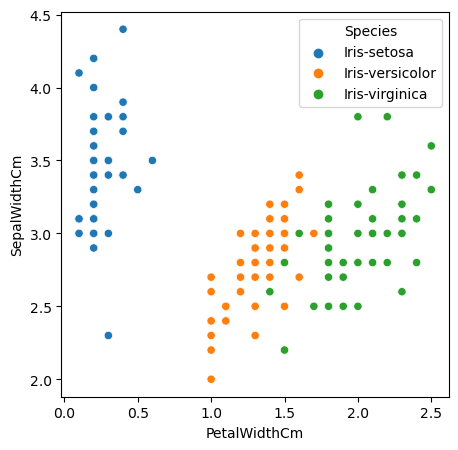

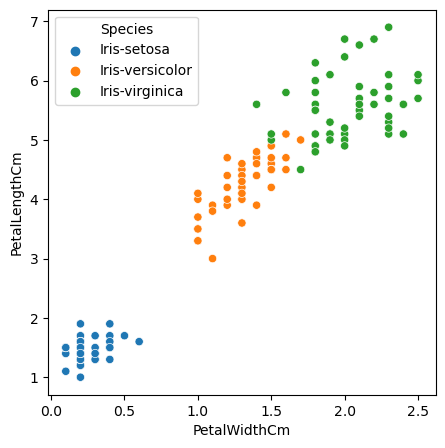

In [11]:
for i in range(len(cols)-1):
    for j in range(i, len(cols)-1):
        if i != j:
            plt.figure(figsize=(5, 5))
            sns.scatterplot(data=df, x=cols[j], y=cols[i], hue='Species')
            plt.show()

The scatter plots show clearly that the clustering between different species is well defined.

# 2. Decision tree classifier to predict iris species
================================================================================

Split features and target variables

In [12]:
features = df2[[column for column in list(cols) if column != 'EncodedSpecies']] # We exclude the EncodedSpecies column as a feature since it is the expected result of the classifier(Target)
target = df['Species']   # The aim is to classify the species of the flower correctly; therefore the target is species type

X, y = features, target
X.head(), y.head()

(   SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm
 0            5.1           3.5            1.4           0.2
 1            4.9           3.0            1.4           0.2
 2            4.7           3.2            1.3           0.2
 3            4.6           3.1            1.5           0.2
 4            5.0           3.6            1.4           0.2,
 0    Iris-setosa
 1    Iris-setosa
 2    Iris-setosa
 3    Iris-setosa
 4    Iris-setosa
 Name: Species, dtype: object)

In [13]:
# Split the data into training and testing series.
# The testing data is set as 20% of the whole dataset, selected randomly
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# The number of training and test value counts
y_train.value_counts(), y_test.value_counts()

(Species
 Iris-versicolor    41
 Iris-setosa        40
 Iris-virginica     39
 Name: count, dtype: int64,
 Species
 Iris-virginica     11
 Iris-setosa        10
 Iris-versicolor     9
 Name: count, dtype: int64)

[Text(0.3333333333333333, 0.9, 'PetalLengthCm <= 2.45\ngini = 0.667\nsamples = 120\nvalue = [40, 41, 39]\nclass = Iris-versicolor'),
 Text(0.2222222222222222, 0.7, 'gini = 0.0\nsamples = 40\nvalue = [40, 0, 0]\nclass = Iris-setosa'),
 Text(0.4444444444444444, 0.7, 'PetalLengthCm <= 4.75\ngini = 0.5\nsamples = 80\nvalue = [0, 41, 39]\nclass = Iris-versicolor'),
 Text(0.2222222222222222, 0.5, 'SepalLengthCm <= 5.15\ngini = 0.053\nsamples = 37\nvalue = [0, 36, 1]\nclass = Iris-versicolor'),
 Text(0.1111111111111111, 0.3, 'gini = 0.32\nsamples = 5\nvalue = [0, 4, 1]\nclass = Iris-versicolor'),
 Text(0.3333333333333333, 0.3, 'gini = 0.0\nsamples = 32\nvalue = [0, 32, 0]\nclass = Iris-versicolor'),
 Text(0.6666666666666666, 0.5, 'PetalWidthCm <= 1.75\ngini = 0.206\nsamples = 43\nvalue = [0, 5, 38]\nclass = Iris-virginica'),
 Text(0.5555555555555556, 0.3, 'gini = 0.5\nsamples = 8\nvalue = [0, 4, 4]\nclass = Iris-versicolor'),
 Text(0.7777777777777778, 0.3, 'PetalLengthCm <= 4.95\ngini = 0.056

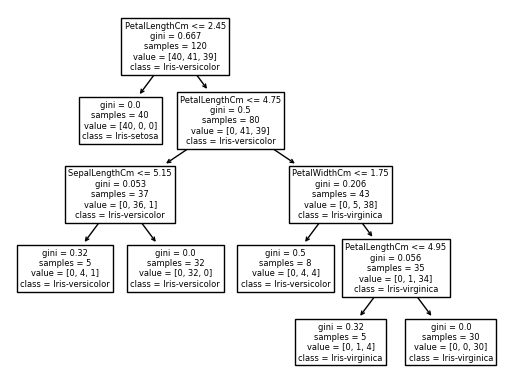

In [14]:
# Initialize a decision tree and train using DecisionTreeClassifier from sklearn.tree
from sklearn import tree

D_tree = tree.DecisionTreeClassifier(criterion='gini', max_depth=10, min_samples_leaf=5)
D_tree = D_tree.fit(X_train, y_train)

target_class = ['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'] # Define the target values
colmn = ['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm',
       'EncodedSpecies']

tree.plot_tree(D_tree, feature_names=colmn, class_names=target_class)

Evaluate the decision tree

In [15]:
y_predicted = D_tree.predict(X_test)
y_predicted_probability = D_tree.predict_proba(X_test)
y_predicted, y_predicted_probability

(array(['Iris-versicolor', 'Iris-setosa', 'Iris-virginica',
        'Iris-versicolor', 'Iris-versicolor', 'Iris-setosa',
        'Iris-versicolor', 'Iris-virginica', 'Iris-versicolor',
        'Iris-versicolor', 'Iris-virginica', 'Iris-setosa', 'Iris-setosa',
        'Iris-setosa', 'Iris-setosa', 'Iris-versicolor', 'Iris-virginica',
        'Iris-versicolor', 'Iris-versicolor', 'Iris-virginica',
        'Iris-setosa', 'Iris-virginica', 'Iris-setosa', 'Iris-virginica',
        'Iris-virginica', 'Iris-virginica', 'Iris-virginica',
        'Iris-virginica', 'Iris-setosa', 'Iris-setosa'], dtype=object),
 array([[0. , 1. , 0. ],
        [1. , 0. , 0. ],
        [0. , 0. , 1. ],
        [0. , 1. , 0. ],
        [0. , 0.5, 0.5],
        [1. , 0. , 0. ],
        [0. , 1. , 0. ],
        [0. , 0. , 1. ],
        [0. , 1. , 0. ],
        [0. , 1. , 0. ],
        [0. , 0. , 1. ],
        [1. , 0. , 0. ],
        [1. , 0. , 0. ],
        [1. , 0. , 0. ],
        [1. , 0. , 0. ],
        [0. , 1. ,

# 3. Evaluate decision tree classifier using accuracy, precision, and recall
=======================================================================================================================

In [16]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, classification_report
# Accuracy
accuracy = accuracy_score(y_test, y_predicted)
print(f"Accuracy: {accuracy}")

# Precision
precision = precision_score(y_test, y_predicted, average='weighted') # Use 'weighted' for multi-class
print(f"Precision: {precision}")

# Recall
recall = recall_score(y_test, y_predicted, average='weighted') # Use 'weighted' for multi-class
print(f"Recall: {recall}")

# Classification Report
print(classification_report(y_test, y_predicted))

Accuracy: 1.0
Precision: 1.0
Recall: 1.0
                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        10
Iris-versicolor       1.00      1.00      1.00         9
 Iris-virginica       1.00      1.00      1.00        11

       accuracy                           1.00        30
      macro avg       1.00      1.00      1.00        30
   weighted avg       1.00      1.00      1.00        30



=========================
END
======================